In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [89]:
dataset = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [91]:
dataset.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

<AxesSubplot:xlabel='label', ylabel='count'>

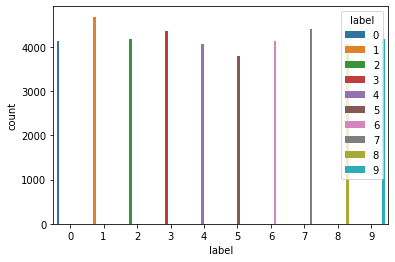

In [92]:
plt.figure(1)
sns.countplot(data = dataset, x = 'label', hue = 'label')

In [93]:
dataset = dataset.astype('float64')

In [94]:
x_tr = dataset.iloc[:,1:].values
y_tr = dataset.iloc[:,0].values

In [95]:
x_tr.shape

(42000, 784)

In [96]:
x_tr /= 255
x_tr[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [97]:
x_tr = x_tr.reshape(42000,28,28,1)

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_tr,y_tr,test_size = 0.2, random_state = 1)

In [99]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import EarlyStopping

In [100]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = (28,28)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', use_bias=True))
model.add(Dropout(0.5))
model.add(Dense(70, activation='relu', use_bias=True))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [101]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=12)

Epoch 1/12
1050/1050 [==============================] - 8s 7ms/step - loss: 0.6083 - accuracy: 0.8113
Epoch 2/12
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2899 - accuracy: 0.9180
Epoch 3/12
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2189 - accuracy: 0.9391
Epoch 4/12
1050/1050 [==============================] - 8s 8ms/step - loss: 0.1843 - accuracy: 0.9487
Epoch 5/12
1050/1050 [==============================] - 8s 7ms/step - loss: 0.1559 - accuracy: 0.9571
Epoch 6/12
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1409 - accuracy: 0.9601
Epoch 7/12
1050/1050 [==============================] - 8s 7ms/step - loss: 0.1289 - accuracy: 0.9637
Epoch 8/12
1050/1050 [==============================] - 9s 8ms/step - loss: 0.1168 - accuracy: 0.9659
Epoch 9/12
1050/1050 [==============================] - 8s 7ms/step - loss: 0.1086 - accuracy: 0.9692
Epoch 10/12
1050/1050 [==============================] - 7s 7ms/step - loss: 0.099

In [102]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

263/263 [==============================] - 1s 3ms/step - loss: 0.0774 - accuracy: 0.9795

Test accuracy: 0.9795238375663757


In [103]:
test_dataset = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [104]:
test_dataset /= 255

In [105]:
test_dataset.shape

(28000, 784)

In [106]:
test_dataset = test_dataset.astype('float64')

In [107]:
test_dataset = np.array(test_dataset)

In [108]:
test_dataset = test_dataset.reshape(test_dataset.shape[0],28,28,1)

In [109]:
predictions = model.predict(test_dataset)
print("Probability Predictions :\n" , predictions)

Probability Predictions :
 [[2.1523321e-15 2.3359103e-12 1.0000000e+00 ... 3.7211939e-12
  1.0357086e-11 5.0631582e-22]
 [9.9999964e-01 4.6166544e-15 5.7975509e-09 ... 1.4530324e-12
  2.5308746e-09 5.9852684e-10]
 [2.6990635e-11 2.7135401e-09 4.2893721e-08 ... 8.9231963e-07
  6.4305645e-09 9.9917454e-01]
 ...
 [1.8483798e-26 2.4830632e-14 1.2259288e-12 ... 2.7607951e-14
  7.5317207e-14 1.8118735e-13]
 [1.3597672e-13 2.2344790e-13 1.2874725e-10 ... 4.1118259e-10
  2.4234048e-09 9.9994707e-01]
 [5.8953180e-15 2.4334755e-11 1.0000000e+00 ... 4.3004652e-11
  7.0148626e-10 6.0262033e-20]]


In [110]:
predictions.shape

(28000, 10)

In [111]:
predictions = np.array(predictions)

In [112]:
predicts_out = np.argmax(predictions, axis=1)

In [113]:
predicts_out.shape

(28000,)

In [114]:
predicts_out[0:5]

array([2, 0, 9, 9, 3])

In [115]:
sample = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [116]:
submission = sample[['ImageId']]

In [117]:
submission

,ImageId
0,1
1,2
2,3
3,4
4,5
...,...
27995,27996
27996,27997
27997,27998
27998,27999


In [118]:
submission['Label'] = predicts_out

In [119]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [120]:
submission.to_csv('submission.csv',index=None)